# Name : Mohammad Sabik Irbaz
# Student ID : 160041004
# Course : CSE 4836 - Pattern Recognition Lab
# Lab : 01
# Topic : Nearest Neighbour algorithm, K-NN algorithm, Hyperparameter Tuning, Validation set, Cross validation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time 

np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')


#Task - 01 : 
Load the CIFAR-10 Dataset using the following lines of code: 

*from keras.datasets import cifar10 \\
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()* 

Explore the dataset by printing the shapes of x_train, y_train, x_test, y_test and by showing some of the images.

In [ ]:
from keras.datasets import cifar10 
(x_train, y_train) , (x_test, y_test) = cifar10.load_data() 

In [ ]:
x_train.shape, y_train.shape , x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

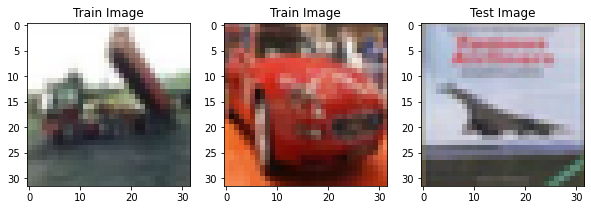

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(131).set_title('Train Image')
plt.imshow(x_train[2])

plt.subplot(132).set_title('Train Image')
plt.imshow(x_train[5])

plt.subplot(133).set_title('Test Image')
plt.imshow(x_test[3])

plt.show()

#Task - 02 : 
Write a function that will take have the parameters (r,c) and show r*c number of images at random from the dataset (use subplot of matplotlib). There will be r-rows and c-columns in the figure. Show the class-label of each image in X-axis. 

Execute the function for different combinations and show the outputs in your notebook.


In [ ]:
def show_img_batch(r,c):

  fig, axs = plt.subplots(r, c)

  x = np.random.randint(x_train.shape[0]-1, size=(r,c))
  
  for i in range(r):
    for j in range(c):
      if r==1:
        axs[j].imshow(x_train[x[i,j]])
        axs[j].set_title(y_train[x[i,j]])
      elif c==1:
        axs[i].imshow(x_train[x[i,j]])
        axs[i].set_title(y_train[x[i,j]])
      else :
        axs[i,j].imshow(x_train[x[i,j]])
        axs[i,j].set_title(y_train[x[i,j]])
    
    for ax in axs.flat:
      ax.label_outer()
  
  plt.show()

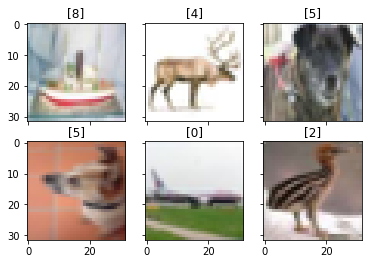

In [ ]:
show_img_batch(2,3)

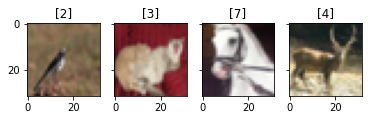

In [ ]:
show_img_batch(1,4)

# Task - 03 
Write two different functions for calculating L1 & L2 distance between two images. (use formulas from lecture slides). 

Demonstrate the output using two 3×3×3 images.(Assign intensity values within 0-255 range at random and calculate the distance).

In [ ]:
def L1_distance_img(x,y):
  return np.sum(np.abs(x-y))

In [ ]:
def L2_distance_img(x,y):
  return np.sqrt(np.sum((x-y)*(x-y)))

In [ ]:
img1 = np.random.randint(255, size=(3,3,3))
img1

array([[[ 87,  70, 216],
        [ 88, 140,  58],
        [193, 230,  39]],

       [[ 87, 174,  88],
        [ 81, 165,  25],
        [ 77,  72,   9]],

       [[148, 115, 208],
        [243, 197, 254],
        [ 79, 175, 192]]])

In [ ]:
img2 = np.random.randint(255, size=(3,3,3))
img2

array([[[ 82,  99, 216],
        [177, 243,  29],
        [147, 147, 142]],

       [[167,  32, 193],
        [  9, 185, 127],
        [ 32,  31, 202]],

       [[244, 151, 163],
        [254, 203, 114],
        [183,  28,  34]]])

In [ ]:
L1_distance_img(img1,img2)

2030

In [ ]:
L2_distance_img(img1,img2)

473.35610273873095

# Task - 04
Write a function which will take an image from x_test and predict the class-label of that image using Nearest Neighbour(NN) algorithm. Show whether the output for that image is correct or not by comparing the corresponding True class label from y_test.

[Use the images of x_train for calculating the distance. Do not use any built-in function for implementing NN algorithms or calculating distances. However, using Numpy functions is allowed.]


In [ ]:
class NearestNeighbor:
  def __init__(self):
    pass
  
  def train(self, x, y):
    self.xtr = x
    self.ytr = y
  
  def predict_one_img(self,x):
    dist=[]

    for i in range(self.xtr.shape[0]):
      dist.append(L1_distance_img(self.xtr[i],x))

    dist = np.asarray(dist)
    min_idx = np.argmin(dist)
    
    return self.ytr[min_idx]

In [ ]:
NN = NearestNeighbor()
NN.train(x_train,y_train)

In [ ]:
img_idx = np.random.randint(x_test.shape[0]-1)

target_img = x_test[img_idx]
target_label = y_test[img_idx]

pred = NN.predict_one_img(target_img)
actual = target_label

print("Test Image Index",img_idx)
print("Predicted Label",pred)
print("True Label",actual)

if pred[0] == actual[0] : print("Correctly Predicted")
else : print("Incorrectly Predicted")


Test Image Index 7221
Predicted Label [8]
True Label [3]
Incorrectly Predicted


# Task - 05
Modify the NN algorithm to compare with k-nearest neighbours instead of only the NN. 

Show the class output using both L1 and L2 distance and for K values 1...10.


In [ ]:
class KNearestNeighbor:
  def __init__(self):
    pass
  
  def train(self, x, y):
    self.xtr = x
    self.ytr = y
  
  def predict_one_img(self, x, k, L): # for Task - 05
    
    dist=[]
    for i in range(self.xtr.shape[0]):
      if L==1 : dist.append(L1_distance_img(self.xtr[i],x))
      else : dist.append(L2_distance_img(self.xtr[i],x))
    dist = np.asarray(dist)

    sorted_dist = np.sort(dist,kind='mergesort')
    
    knn_distance = sorted_dist[k-1]
    idx=[]

    for i in range(dist.shape[0]):
      if dist[i]<=knn_distance :
        idx.append(self.ytr[i])
    idx = np.asarray(idx)
    
    return np.bincount(idx[:,0]).argmax()

  def predict(self, x, k, L): # for Task - 06

    t0= time.clock()
    m = x.shape[0] # number of test samples
    y_pred = np.zeros(m,dtype=self.ytr.dtype)

    for t in range(m):
      
      if t%100 == 0 : 
        t1 = time.clock() - t0
        print("Predicting sample ==>",t,"---- Time elapsed:",t1)

      dist=[]
      for i in range(self.xtr.shape[0]):
        if L==1 : dist.append(L1_distance_img(self.xtr[i],x[t]))
        else : dist.append(L2_distance_img(self.xtr[i],x[t]))
      dist = np.asarray(dist)

      sorted_dist = np.sort(dist,kind='mergesort')
    
      knn_distance = sorted_dist[k-1]
      idx=[]

      for i in range(dist.shape[0]):
        if dist[i]<=knn_distance :
          idx.append(self.ytr[i])
      idx = np.asarray(idx)

      y_pred[t] = np.bincount(idx[:,0]).argmax()

    print("Predicting Complete.....")
    t1 = time.clock() - t0
    print("Total Time elapsed:", t1)

    return y_pred

  def evaluate(self, y, y_pred): # for Task - 06
    m = y.shape[0]
    correct = 0
    for i in range(m):
      if y_pred[i]==y[i]: correct += 1
    
    accuracy = (correct/m)*100
    return accuracy

  def topksimilar(self,x,k,L): # for Task - 07
    dist=[]
    for i in range(self.xtr.shape[0]):
      if L==1 : dist.append(L1_distance_img(self.xtr[i],x))
      else : dist.append(L2_distance_img(self.xtr[i],x))
    dist = np.asarray(dist)

    sorted_dist = np.sort(dist,kind='mergesort')

    knn_distance = sorted_dist[k-1]
    idx=[]

    for i in range(dist.shape[0]):
      if dist[i]<=knn_distance and len(idx)<k:
        idx.append(i)

    fig, axs = plt.subplots(1,k+1)
    axs[0].imshow(x)

    for i in range(k): axs[i+1].imshow(self.xtr[idx[i]])
    plt.show()

    return

In [ ]:
knn = KNearestNeighbor()
knn.train(x_train,y_train)

In [ ]:
img_idx = np.random.randint(x_test.shape[0]-1)

print("Test Image Index",img_idx)

target_img = x_test[img_idx]
target_label = y_test[img_idx]

for i in range(1,11):
  for j in range(1,3):
    print("\nUsing k =",i," and L -",j,"distance")

    pred = knn.predict_one_img(target_img,i,j)
    actual = target_label

    print("Predicted Label :",pred)
    print("True Label :",actual[0])

    if pred == actual[0] : print("Correctly Predicted")
    else : print("Incorrectly Predicted")

Test Image Index 6021

Using k = 1  and L - 1 distance
Predicted Label : 0
True Label : 3
Incorrectly Predicted

Using k = 1  and L - 2 distance
Predicted Label : 0
True Label : 3
Incorrectly Predicted

Using k = 2  and L - 1 distance
Predicted Label : 0
True Label : 3
Incorrectly Predicted

Using k = 2  and L - 2 distance
Predicted Label : 0
True Label : 3
Incorrectly Predicted

Using k = 3  and L - 1 distance
Predicted Label : 0
True Label : 3
Incorrectly Predicted

Using k = 3  and L - 2 distance
Predicted Label : 0
True Label : 3
Incorrectly Predicted

Using k = 4  and L - 1 distance
Predicted Label : 0
True Label : 3
Incorrectly Predicted

Using k = 4  and L - 2 distance
Predicted Label : 3
True Label : 3
Correctly Predicted

Using k = 5  and L - 1 distance
Predicted Label : 0
True Label : 3
Incorrectly Predicted

Using k = 5  and L - 2 distance
Predicted Label : 0
True Label : 3
Incorrectly Predicted

Using k = 6  and L - 1 distance
Predicted Label : 0
True Label : 3
Incorrectly 

# Task - 06 
Make an experiment to find the optimum value of K within the range from 1...100 for your dataset. For this, you need to find out the predicted class label of all samples of x_test and compare with y_test to find out the accuracy of classification.

Plot a 2D graph with different values of k in the X-axis and accuracy of your model for that value of k in Y-axis. 

accuracy = (# of correctly classified samples/ total # of samples) * 100

In [ ]:
num_train = 2500
idx = list(range(num_train))
x_train = x_train[idx]
y_train = y_train[idx]

num_test = 500
idx = list(range(num_test))
x_test = x_test[idx]
y_test = y_test[idx]

x_train.shape, x_test.shape

((2500, 32, 32, 3), (500, 32, 32, 3))

In [ ]:
knn = KNearestNeighbor()
knn.train(x_train,y_train)

In [ ]:
# y_pred = knn.predict(x_test,1,1)

In [ ]:
# knn.evaluate(y_test,y_pred)

**function *evaluate()* declared in KNearestNeighbor class**

In [ ]:
acc = []
k = []

for i in range(1,101):
  print("\nUsing k =",i)
  k.append(i)
  L = 1
  y_pred = knn.predict(x_test,i,L)
  accuracy = knn.evaluate(y_test,y_pred)
  print("Accuracy:",accuracy)
  acc.append(accuracy)


Using k = 1
Predicting sample ==> 0 ---- Time elapsed: 2.200000000129876e-05
Predicting sample ==> 100 ---- Time elapsed: 3.3235500000000116
Predicting sample ==> 200 ---- Time elapsed: 6.62838400000004
Predicting sample ==> 300 ---- Time elapsed: 9.95320300000003
Predicting sample ==> 400 ---- Time elapsed: 13.259124000000043
Predicting Complete.....
Total Time elapsed: 16.559596
Accuracy: 18.8

Using k = 2
Predicting sample ==> 0 ---- Time elapsed: 4.500000000007276e-05
Predicting sample ==> 100 ---- Time elapsed: 3.320687000000021
Predicting sample ==> 200 ---- Time elapsed: 6.594010000000026
Predicting sample ==> 300 ---- Time elapsed: 9.890147000000013
Predicting sample ==> 400 ---- Time elapsed: 13.171496999999988
Predicting Complete.....
Total Time elapsed: 16.442205
Accuracy: 16.2

Using k = 3
Predicting sample ==> 0 ---- Time elapsed: 2.200000000129876e-05
Predicting sample ==> 100 ---- Time elapsed: 3.292948000000024
Predicting sample ==> 200 ---- Time elapsed: 6.56444499999

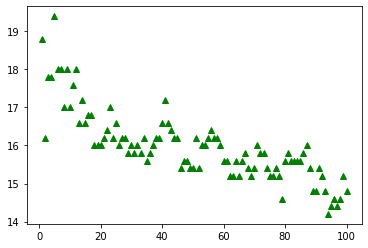

In [ ]:
plt.plot(k,acc,'g^')
plt.show()

In [ ]:
acc = np.asarray(acc)
optimum_k = np.argmax(acc)
print("Optimum Value of k is",optimum_k+1,"which results in accuracy of",acc[optimum_k],"%")

Optimum Value of k is 5 which results in accuracy of 19.400000000000002 %


# Task - 7
Write a function which will randomly select an image from the x_test and show the top 5 similar images. Output will be a figure with one row and 6-columns, where each row will contain the reference image from the test set and 5 of it’s nearest neighbours.

**function *topksimilar()* declared in the KNearestNeighbor class**

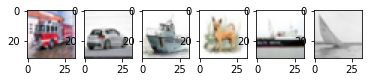

In [ ]:
img_idx = np.random.randint(x_test.shape[0]-1)
img = x_test[img_idx]
k = 5
L = 1
knn.topksimilar(img,k,L)

# Task - 08
Now, instead of splitting your dataset into x_train & x_test, divide the whole dataset into three parts like x_train, x_validate, x_test. (For this time, just split the current x_train into two parts with x_train having 40000 images and 10000 for x_validate. Keep x_test as it was).

Now use your experience from the previous tasks to find out the optimum hyperparameters (distance metric and K). Use the obtained hyperparameters for the x_test set and find out the accuracy of your overall system. 

[x_test shouldn’t be touched while finding the optimum hyperparameters.]


In [ ]:
num_train = 2000
num_valid = 500

idx = list(range(num_train,num_train+num_valid))
x_valid = x_train[idx]
y_valid = y_train[idx]

idx = list(range(num_train))
x_train = x_train[idx]
y_train = y_train[idx]

x_train.shape, x_valid.shape, x_test.shape

((2000, 32, 32, 3), (500, 32, 32, 3), (500, 32, 32, 3))

In [ ]:
knn = KNearestNeighbor()
knn.train(x_train,y_train)

In [ ]:
acc = []

for i in range(1,101):
  for j in range(1,3):
    print("\nUsing k =",i,"and L -",j,"distance metric")
    L = j
    y_pred = knn.predict(x_valid,i,L)
    accuracy = knn.evaluate(y_valid,y_pred)
    print("Accuracy:",accuracy)
    acc.append(accuracy)


Using k = 1 and L - 1 distance metric
Predicting sample ==> 0 ---- Time elapsed: 2.3999999939405825e-05
Predicting sample ==> 100 ---- Time elapsed: 2.6932080000001406
Predicting sample ==> 200 ---- Time elapsed: 5.317677000000003
Predicting sample ==> 300 ---- Time elapsed: 7.952702000000045
Predicting sample ==> 400 ---- Time elapsed: 10.600397000000157
Predicting Complete.....
Total Time elapsed: 13.257392999999865
Accuracy: 20.4

Using k = 1 and L - 2 distance metric
Predicting sample ==> 0 ---- Time elapsed: 1.900000006571645e-05
Predicting sample ==> 100 ---- Time elapsed: 3.500540000000001
Predicting sample ==> 200 ---- Time elapsed: 6.987824000000273
Predicting sample ==> 300 ---- Time elapsed: 10.498601000000235
Predicting sample ==> 400 ---- Time elapsed: 14.010267000000113
Predicting Complete.....
Total Time elapsed: 17.496483000000353
Accuracy: 21.6

Using k = 2 and L - 1 distance metric
Predicting sample ==> 0 ---- Time elapsed: 1.4999999621068127e-05
Predicting sample ==

In [ ]:
acc = np.asarray(acc)
cand = np.argmax(acc)
optimum_L = int((cand%2)+1)
optimum_k = int((cand/2)+1)
print("Optimum Value of k is",optimum_k,"and distance metric: L -",optimum_L)

Optimum Value of k is 75 and distance metric: L - 2


In [ ]:
y_pred = knn.predict(x_test,optimum_k,optimum_L)
accuracy = knn.evaluate(y_test,y_pred)
print("Overall Accuracy:",accuracy)

Predicting sample ==> 0 ---- Time elapsed: 2.500000027794158e-05
Predicting sample ==> 100 ---- Time elapsed: 3.5774890000002415
Predicting sample ==> 200 ---- Time elapsed: 7.149887999999919
Predicting sample ==> 300 ---- Time elapsed: 10.720688999999766
Predicting sample ==> 400 ---- Time elapsed: 14.229739000000336
Predicting Complete.....
Total Time elapsed: 17.76557799999955
Overall Accuracy: 22.8


# Task - 09
Finally, apply 5-fold cross validation in your dataset to find out the optimum hyperparameters and evaluate the accuracy for x_test.

Draw a figure  to demonstrate the result of the K-fold cross validation as mentioned in the lecture.(put K in X-axis and accuracy for 5 folds in Y-axis).


In [ ]:
x_train = np.concatenate((x_train,x_valid))
y_train = np.concatenate((y_train,y_valid))
x_train.shape,y_train.shape

((2500, 32, 32, 3), (2500, 1))

**For L1 distance metric**

In [ ]:
fold = 5
train_split = np.array_split(x_train, fold)
label_split = np.array_split(y_train, fold)
label_split[4].shape,train_split[4].shape

((500, 1), (500, 32, 32, 3))

In [ ]:
accuracy = {}

for i in range(1,101): accuracy[i]={}

for i in range(fold):
  
  valid_set = train_split[i]
  valid_label = label_split[i]
  cand_set = []
  cand_label = []
  for j in range(fold): 
    if i!=j : 
      cand_set.append(train_split[j])
      cand_label.append(label_split[j])

  train_set = cand_set[0]
  train_label = cand_label[0]
  for j in range(1,len(cand_set)): 
    train_set = np.concatenate((train_set,cand_set[j]))
    train_label = np.concatenate((train_label,cand_label[j]))

  knn = KNearestNeighbor()
  knn.train(train_set,train_label)

  for j in range(1,101):
      print("\nUsing k =",j," on",i+1,"fold")
      L = 1
      y_pred = knn.predict(valid_set,j,L)
      acc = knn.evaluate(valid_label,y_pred)
      print("Accuracy:",acc)
      accuracy[j][i+1]=acc


Streaming output truncated to the last 5000 lines.
Using k = 1  on 1 fold
Predicting sample ==> 0 ---- Time elapsed: 1.7999999727180693e-05
Predicting sample ==> 100 ---- Time elapsed: 2.6176809999997204
Predicting sample ==> 200 ---- Time elapsed: 5.24684999999954
Predicting sample ==> 300 ---- Time elapsed: 7.867345999999998
Predicting sample ==> 400 ---- Time elapsed: 10.482858000000306
Predicting Complete.....
Total Time elapsed: 13.127749000000222
Accuracy: 18.0

Using k = 2  on 1 fold
Predicting sample ==> 0 ---- Time elapsed: 1.4999999621068127e-05
Predicting sample ==> 100 ---- Time elapsed: 2.630693000000065
Predicting sample ==> 200 ---- Time elapsed: 5.259356999999909
Predicting sample ==> 300 ---- Time elapsed: 7.8905729999996765
Predicting sample ==> 400 ---- Time elapsed: 10.493313999999373
Predicting Complete.....
Total Time elapsed: 13.144964000000073
Accuracy: 17.599999999999998

Using k = 3  on 1 fold
Predicting sample ==> 0 ---- Time elapsed: 1.700000029813964e-05
Pr

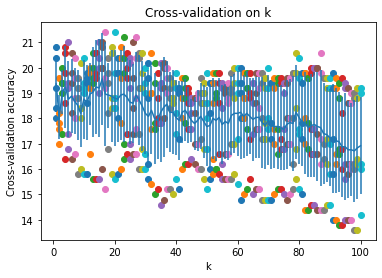

In [ ]:
acc_mean = []
acc_std = []

for k in range(1,101):
    cand = accuracy[k]
    acc = []
    for i in range(1,6): acc.append(cand[i])
    plt.scatter([k] * len(acc), acc)
    acc = np.asarray(acc)
    acc_mean.append(np.mean(acc))
    acc_std.append(np.std(acc))

plt.errorbar(list(range(1,101)), acc_mean, yerr=acc_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

**For L2 distance metric**

In [ ]:
fold = 5
train_split = np.array_split(x_train, fold)
label_split = np.array_split(y_train, fold)
label_split[4].shape,train_split[4].shape

((500, 1), (500, 32, 32, 3))

In [ ]:
accuracy2 = {}

for i in range(1,101): accuracy2[i]={}

for i in range(fold):
  
  valid_set = train_split[i]
  valid_label = label_split[i]
  cand_set = []
  cand_label = []
  for j in range(fold): 
    if i!=j : 
      cand_set.append(train_split[j])
      cand_label.append(label_split[j])

  train_set = cand_set[0]
  train_label = cand_label[0]
  for j in range(1,len(cand_set)): 
    train_set = np.concatenate((train_set,cand_set[j]))
    train_label = np.concatenate((train_label,cand_label[j]))

  knn = KNearestNeighbor()
  knn.train(train_set,train_label)

  for j in range(1,101):
      print("\nUsing k =",j," on",i+1,"fold")
      L = 2
      y_pred = knn.predict(valid_set,j,L)
      acc = knn.evaluate(valid_label,y_pred)
      print("Accuracy:",acc)
      accuracy2[j][i+1]=acc

Streaming output truncated to the last 5000 lines.
Using k = 1  on 1 fold
Predicting sample ==> 0 ---- Time elapsed: 1.9999999494757503e-05
Predicting sample ==> 100 ---- Time elapsed: 3.489462999999887
Predicting sample ==> 200 ---- Time elapsed: 6.963619000000108
Predicting sample ==> 300 ---- Time elapsed: 10.433913999999277
Predicting sample ==> 400 ---- Time elapsed: 13.950826000000234
Predicting Complete.....
Total Time elapsed: 17.45939399999952
Accuracy: 19.2

Using k = 2  on 1 fold
Predicting sample ==> 0 ---- Time elapsed: 2.3999999029911123e-05
Predicting sample ==> 100 ---- Time elapsed: 3.5061339999992924
Predicting sample ==> 200 ---- Time elapsed: 7.006750999998985
Predicting sample ==> 300 ---- Time elapsed: 10.504730999999083
Predicting sample ==> 400 ---- Time elapsed: 14.004375999998956
Predicting Complete.....
Total Time elapsed: 17.523059999999532
Accuracy: 16.8

Using k = 3  on 1 fold
Predicting sample ==> 0 ---- Time elapsed: 2.2000000171829015e-05
Predicting sam

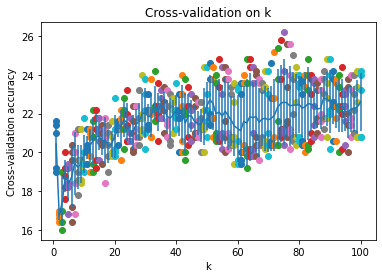

In [ ]:
acc_mean2 = []
acc_std2 = []

for k in range(1,101):
    cand = accuracy2[k]
    acc = []
    for i in range(1,6): acc.append(cand[i])
    plt.scatter([k] * len(acc), acc)
    acc = np.asarray(acc)
    acc_mean2.append(np.mean(acc))
    acc_std2.append(np.std(acc))

plt.errorbar(list(range(1,101)), acc_mean2, yerr=acc_std2)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [ ]:
acc_mean = np.asarray(acc_mean)
acc_mean2 = np.asarray(acc_mean2)
acc = np.argmax(acc_mean)
acc2 = np.argmax(acc_mean2)
optimal_L = 0
optimum_k = 0

if acc>=acc2 :
  optimal_L = 1
  optimum_k = acc+1
  print("Optimum Value of k is",optimum_k," and optimal distance metric is L-1 \nwhich results in",acc_mean[optimum_k-1],"% mean accuracy in 5-fold cross-validation")

else :
  optimal_L = 2
  optimum_k = acc2+1
  print("Optimum Value of k is",optimum_k," and optimal distance metric is L-2 \nwhich results in",acc_mean2[optimum_k-1],"% mean accuracy in 5-fold cross-validation")

Optimum Value of k is 88  and optimal distance metric is L-2 
which results in 22.8 % mean accuracy in 5-fold cross-validation


In [ ]:
knn = KNearestNeighbor()
knn.train(x_train,y_train)

In [ ]:
y_pred = knn.predict(x_test,optimum_k,optimum_L)
accuracy = knn.evaluate(y_test,y_pred)
print("Overall Accuracy: ",accuracy)

Predicting sample ==> 0 ---- Time elapsed: 3.199999991920777e-05
Predicting sample ==> 100 ---- Time elapsed: 4.42449299999862
Predicting sample ==> 200 ---- Time elapsed: 8.784067999997205
Predicting sample ==> 300 ---- Time elapsed: 13.12791599999764
Predicting sample ==> 400 ---- Time elapsed: 17.47935999999754
Predicting Complete.....
Total Time elapsed: 21.82026699999915
Overall Accuracy:  22.6
